In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U selenium

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
import time
from urllib.request import urlopen, urlretrieve

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Aishwarya
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya
[nltk_data]     Patil\AppData\Roaming\nltk_data...


True

In [9]:
url = "https://www.imdb.com/title/tt0108778/reviews?ref_=tt_ql_3"
html=urlopen(url)
content_bs=BeautifulSoup(html)

In [10]:
reviews=[]

In [11]:
reviews = content_bs.findAll("div",attrs={"class","text"})
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

In [12]:
friends_reviews = pd.DataFrame(columns = ["reviews"])

In [13]:
friends_reviews["reviews"]= reviews
friends_reviews.head(5)

,reviews
0,I still love Friends as much now than I did wh...
1,People are saying that friends is running out ...
2,Friends has got to be one of the best Us Sitco...
3,Easily in my top five category of funniest and...
4,Everyone says that Seinfield is the greatest s...


In [14]:
txt_upd = ' '.join(reviews)

In [15]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() 
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() 
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower()

In [16]:
text_tokens = word_tokenize(txt_upd)

In [17]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [18]:
tf = TfidfVectorizer()

In [19]:
text_tf = tf.fit_transform(tokens_without_sw)

In [20]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()

C:\Games\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df =pd.DataFrame(denselist, columns=feature_names)
df

,ability,aborted,absolute,absolutely,accepted,accolades,accurately,act,acted,acting,...,worst,worth,writers,writing,written,wrong,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
word_list = ' '.join(df)

In [23]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

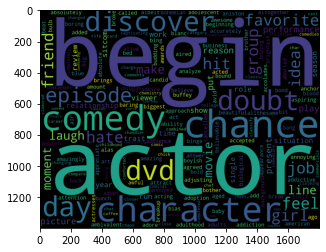

In [24]:
plt.imshow(wordcloud)

In [26]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [27]:
positive_words = positive_words[35:]

In [28]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [29]:
negative_words = negative_words[35:]

In [30]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [31]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [32]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [33]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

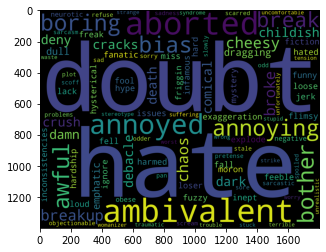

In [34]:
plt.imshow(wordcloud_neg)

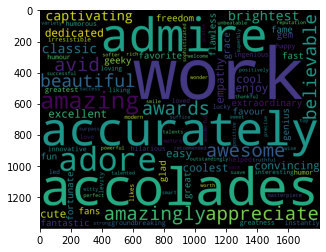

In [35]:
plt.imshow(wordcloud_pos)